In [1]:
from mtcnn import MTCNN
import cv2
import numpy as np
import math
from keras.preprocessing import image
from PIL import Image
 
detector = MTCNN()

def trim(frame):
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop bottom
    elif not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop left
    elif not np.sum(frame[:,0]):
        return trim(frame[:,1:]) 
    #crop right
    elif not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])    
    return frame


def EuclideanDistance(point1,point2):
    # finding sum of squares 
    sum_sq = np.sum(np.square(point1 - point2))
    # Doing squareroot and 
    # printing Euclidean distance 
    return np.sqrt(sum_sq)

    
def alignment_procedure(img, left_eye, right_eye):
#this function aligns given face in img based on left and right eye coordinates
 
    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye

    #-----------------------
    #find rotation direction

    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1 #rotate same direction to clock
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1 #rotate inverse direction of clock

    #-----------------------
    #find length of triangle edges

    a = EuclideanDistance(np.array(left_eye), np.array(point_3rd))
    b = EuclideanDistance(np.array(right_eye), np.array(point_3rd))
    c = EuclideanDistance(np.array(right_eye), np.array(left_eye))

    #-----------------------

    #apply cosine rule

    if b != 0 and c != 0: #this multiplication causes division by zero in cos_a calculation

        cos_a = (b*b + c*c - a*a)/(2*b*c)
        angle = np.arccos(cos_a) #angle in radian
        angle = (angle * 180) / math.pi #radian to degree

        #-----------------------
        #rotate base image

        if direction == -1:
            angle = 90 - angle

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))

    #-----------------------

    return img #return img anyway

img = cv2.imread("G:\\Master Classroom Dataset\\studentsfaces____MTCNN\\0MTCNN5790.jpg")
#G:\\Master Classroom Dataset\\sample13.jpg")

tempimg=img.copy()
detections = detector.detect_faces(img)
     
for detection in detections:
    score = detection["confidence"]
    if score > 0.90:
        x, y, w, h = detection["box"]
        x1,y1,w1,h1=x-20,y-20,w+20,h+20
        detected_face = img[int(y):int(y+h), int(x):int(x+w)]
        cv2.rectangle(tempimg,(x,y),(x+w,y+h),(0,0,255),2)
        keypoints = detection["keypoints"]
        left_eye = keypoints["left_eye"]
        right_eye = keypoints["right_eye"]

        aligned_face=alignment_procedure(detected_face,left_eye,right_eye)
    
    cv2.imshow("image",tempimg)
    cv2.imshow("image1",detected_face)
    cv2.imshow("image2",aligned_face)
    cv2.imwrite("G:\\Master Classroom Dataset\\aligned_sample13.jpg",aligned_face)
    #cv2.imshow("image3",trim(aligned_face))
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

    

Using TensorFlow backend.


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv2d_1/convolution (defined at D:\anaconda3\envs\pck1\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]] [Op:__inference_keras_scratch_graph_791]

Function call stack:
keras_scratch_graph


In [1]:
pwd

'C:\\Users\\pchak\\Phd_Implementation_Works\\Paper1_code'

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 24 11:19:24 2020

@author: pchak
"""
# Executing code for Project 1 Uptodate code

import cv2
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from numba import jit, cuda 
# import openpyxl module 
from openpyxl import Workbook,load_workbook
import csv
import time


output_location='D:\\SGE_Project1\\' #Output location path

def facealing(img):
    return img

def headpose(img):
    return img

    
excelfilename='MTAPsample.xlsx'        #Excel file name
wb = Workbook() 
sheet = wb.active 
sheet['A1']="Frame number"  #total columns= 12
sheet['B1']="Detected_faces"
sheet['C1']="predicted_faces"
sheet['D1']="Sleepy_E0"
sheet['E1']="Boredome_E1"
sheet['F1']="Yawn_E2"
sheet['G1']="Frustrate_E3"
sheet['H1']="Confuse_E4"
sheet['I1']="Engage_E5"
sheet['J1']="Acc_EL1(E0+E1)"
sheet['K1']="Acc_EL2(E2+E3+E4)"
sheet['L1']="Acc_EL3(E5)" 
wb.save(output_location+excelfilename)
excel_path=output_location+excelfilename   


#save student emotion label data into excel
def writedata(lst1,lst2,lst3,lst4,lst5):
    temp_list=[0]*3
    temp_list[0]=lst1
    temp_list[1]=lst2
    temp_list[2]=lst3
    temp_list.extend(lst4)
    temp_list.extend(lst5)
    # To open the workbook  
    # workbook object is created 
    wb_obj = load_workbook(excel_path) 
    sheet=wb_obj.active
    sheet.append(temp_list)
    wb_obj.save(excel_path)

with open(output_location+'MTAPsample.csv', mode='w') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',',lineterminator='\n')
    #employee_writer.writerow(['frameno', 'EL_index'])
    employee_writer.writerow([0, 0])
    employee_file.close()


def graphfile(Fno,ELId):
    tempdata=[0]*2
    #framercounter=0
    #framercounter+=Fno
    tempdata[0]=int(Fno)
    tempdata[1]=int(ELId)
    with open(output_location+'MTAPsample.csv','a') as appendobj:
        append=csv.writer(appendobj,delimiter=",", lineterminator='\n')
        append.writerow(tempdata)
        appendobj.close()
    time.sleep(1)

#Load model for face Detection
print("Loding Face detector model......")
detector = MTCNN()
print("Face detector model is loded.")

#Load model for Emotion Detection
print("Loding Face emotion recognition model......")
model = load_model('G:\\000Phd Drive -Very  Important\\My papers publication stuff\\L1 Paper 1 stuff\\result outputs\\model10.h5')
print("Face emotion recognition model is loded.")

#Read input video stream
cap=cv2.VideoCapture(1)
#cap=cv2.VideoCapture("G:\\000Phd Drive -Very  Important\\My papers publication stuff\\MTAP_LaTeX_DL_468198_240419\\WIN_20201231_17_51_25_Pro.mp4")
#cap=cv2.VideoCapture("G:\\000Phd Drive -Very  Important\\My papers publication stuff\\MTAP figures\\zoom_1.mp4")
#cap=cv2.VideoCapture("G:\\000Phd Drive -Very  Important\\My papers publication stuff\\MTAP_LaTeX_DL_468198_240419\\video_MTAP.mp4")
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


# Get frame rate of video stream
seconds = 0.3 # two frames per second get processed 
fps=cap.get(cv2.CAP_PROP_FPS) # Gets the frames per second
print("Frame rate",fps)
multiplier = fps * seconds

# Required data variables declaration
datalist=list()
frame_emotions=list() # list data structure for storing emotion lables of every frame
accumulator=[0]*6 # emotion accumulator.
EL_counter=[0]*3 #Engagement level counter.
GEL_counter=[0]*3 #Each video segment group engagemtn level index. 
FGEL_counter=[0]*3 # list to maintain overall class group engagement level.

#output video saving file into local disk
fourcc=cv2.VideoWriter_fourcc(*'MJPG')
op = cv2.VideoWriter(output_location+'MTAP_sample_Large.avi',fourcc,5,(width,height)) # 5fps in video #output video filename

FC=0
try:
    while(cap.isOpened()):
        frameId = int(round(cap.get(1))) #current frame number, rounded b/c sometimes you get frame intervals which aren't integers...this adds a little imprecision but is likely good enough
        ref, img_frame = cap.read()
        #frameId=frameId1.copy()
        if frameId % multiplier == 0:
            FC+=1
            #print("Frame Number:",frameId)
            temp_img=img_frame.copy()
            #print frame number on frame
            frame_ID="FrameNo:"+str(frameId)
            
            #frame_count="Frame_count"+str(FC)
            cv2.putText(temp_img, frame_ID, ((10), (50)), cv2.FONT_HERSHEY_DUPLEX, 2, (255,0,255), 4)
            
            #cv2.putText(temp_img, frame_count, ((10), (60)), cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 2,cv2.LINE_AA)
            
            #convert image from BGR2RGB which MTCNN works well
            img_frame = cv2.cvtColor(img_frame, cv2.COLOR_BGR2RGB)
            
            # Detection of faces using MTCNN face detection pre-trained model
            faces = detector.detect_faces(img_frame)
            #print("Detected faces:",len(faces))
            detected_faces=len(faces)
            predicted_faces=0
            
            #processing each face from the detected faces
            for face in faces:
                # get face confidence
                confidence_score=face['confidence']
                #print(confidence_score)
                if confidence_score >= 0.95: # to reduce false prediction occurence
                    xf, yf, wf, hf = face['box']
                    cv2.rectangle(temp_img,(xf-5,yf-5),(xf+wf+5,yf+hf+5),(0,0,255),2)
                    cv2.putText(temp_img, "Non_candidate_face", (int(xf), int(yf)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
                    continue
                x, y, w, h = face['box']
                # create the shape
                cv2.rectangle(temp_img,(x-5,y-5),(x+w+5,y+h+5),(0,255,255),2)
                img_roi=img_frame[y:y+h,x:x+w]#cropping region of interest i.e. face area from  image
                img_roi=cv2.resize(img_roi,(48,48))
                
                #pre-processing
                #1. head pose
                pre_face1=headpose(img_roi)
                
                #2. face alignment
                pre_face2=facealing(pre_face1)
                
                #convert into model specific structure to predict emotion label.
                img_pixels = image.img_to_array(pre_face2)
                img_pixels = np.expand_dims(img_pixels, axis = 0)
                img_pixels /= 255
                
                #Emotion Prediction, it gives probabilities for each emotion to the given input face  
                predictions = model.predict(img_pixels)
                
                #count the no. of faces emotion predicted 
                predicted_faces+=1
                
                #find the index of predicted maximum probability emotion class 
                max_index = np.argmax(predictions)
                accumulator[max_index]+=1
                
                emotions_ID = ('Sleepy', 'Boredome', 'Yawning', 'Frustrated','Confuse', 'Engage')
                emotions = ('0','1','2','3','4','5')
                predicted_emotion = emotions[max_index]
                frame_emotions.extend(predicted_emotion) # write this and frame ID into excel file
                cv2.putText(temp_img, emotions_ID[max_index], (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 4)
            #display image
            temp_img= cv2.resize(temp_img, (1092,720))
            cv2.imshow("image",temp_img)
            cv2.imwrite("G:\\000Phd Drive -Very  Important\\My papers publication stuff\\MTAP figures\\bbb\\"+str(frameId)+".jpg",temp_img)
            #save frames to create video file 
            op.write(temp_img)
            #cv2.waitKey(0)
            #print(accumulator)
            # EL_ counters, save in excel sheet
            EL_counter[0]=EL_counter[0]+(accumulator[0]+accumulator[1])
            EL_counter[1]=EL_counter[1]+(accumulator[2]+accumulator[3]+accumulator[4])
            EL_counter[2]=EL_counter[2]+accumulator[5]
            
            #save data into excel file
            writedata(frameId,detected_faces,predicted_faces,accumulator,EL_counter)
                      
            #print(EL_counter)
            accumulator[:]=[0]*6 #Reset accumulator to zero
            
            if FC % 5 == 0: #video segment length
                GEL_index=np.argmax(EL_counter)
                #send data to write into csv file to get plot in line graph
                graphfile(frameId,GEL_index)
                #print("video segment group engagement index",GEL_index)
                FC=0
                EL_counter[:]=[0]*3 #reset the Egagement level counters
                GEL_counter[GEL_index]+=1 #keep track of video segments engagement index
                #continue:
                     
            if cv2.waitKey(1) & 0xff == ord("q"):
                #op.write(temp_img)
                #writedata(frameId,detected_faces,predicted_faces,accumulator,EL_counter)
                raise #Exception("input video stream interrupted...!!!!")
                break
    
    cap.release()
    #modified 26.12.2020, 5:30pm
    op.release()
except:
    op.write(temp_img)
    writedata(frameId,detected_faces,predicted_faces,accumulator,EL_counter)
    graphfile(frameId,GEL_index)
    print("Video segments group engagement level counter:",GEL_counter)
    FGEF=np.argmax(GEL_counter) 
    print("Overall class engagement level is:",FGEF)
    
finally:         
    cv2.destroyAllWindows()

Using TensorFlow backend.
D:\anaconda3\envs\pck1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\anaconda3\envs\pck1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\anaconda3\envs\pck1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Loding Face detector model......
Face detector model is loded.
Loding Face emotion recognition model......
Face emotion recognition model is loded.
Frame rate 30.0
Video segments group engagement level counter: [27, 26, 46]
Overall class engagement level is: 2


<IPython.core.display.Javascript object>


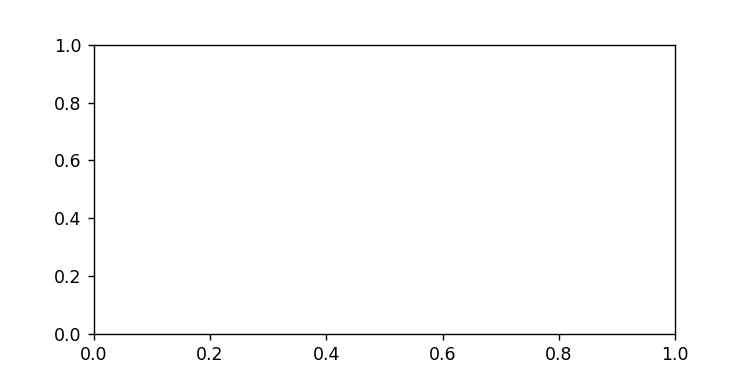

In [11]:
#final code for Graph 27.12.2020 1:20pm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from matplotlib import style
import numpy as np
from pylab import rcParams

%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

#%matplotlib inline
#rcParams['figure.figsize']=8,4

fig = plt.figure(figsize = (6,3))
ax1 = fig.add_subplot(1,1,1)


def animate(i):
    pullData = open("D:\\SGE_Project1\\eng_out_Sample2_Large.csv","r").read()
    dataArray = pullData.split('\n')
    xar = []
    yar = []
    for eachLine in dataArray:
        if len(eachLine)>1:
            x,y = eachLine.split(',')
            xar.append(int(x))
            yar.append(int(y))
    ax1.clear()
    ax1.plot(xar,yar)
    
    
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

In [11]:
# -*- coding: utf-8 -*-

"""
Created on Thu Dec 24 11:19:24 2020

@author: pchak
"""
import cv2
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from numba import jit, cuda 
# import openpyxl module 
from openpyxl import Workbook,load_workbook
import csv
import time

output_location='D:\\SGE_Project1\\' #Output location path

def facealing(img):
    return img

def headpose(img):
    return img

excelfilename='Sample2_Large.xlsx'        #Excel file name
wb = Workbook() 
sheet = wb.active 
sheet['A1']="Frame number"  #total columns= 12
sheet['B1']="Detected_faces"
sheet['C1']="predicted_faces"
sheet['D1']="Sleepy_E0"
sheet['E1']="Boredome_E1"
sheet['F1']="Yawn_E2"
sheet['G1']="Frustrate_E3"
sheet['H1']="Confuse_E4"
sheet['I1']="Engage_E5"
sheet['J1']="Acc_EL1(E0+E1)"
sheet['K1']="Acc_EL2(E2+E3+E4)"
sheet['L1']="Acc_EL3(E5)" 
wb.save(output_location+excelfilename)
excel_path=output_location+excelfilename   


#save student emotion label data into excel
def writedata(lst1,lst2,lst3,lst4,lst5):
    temp_list=[0]*3
    temp_list[0]=lst1
    temp_list[1]=lst2
    temp_list[2]=lst3
    temp_list.extend(lst4)
    temp_list.extend(lst5)
    # To open the workbook  
    # workbook object is created 
    wb_obj = load_workbook(excel_path) 
    sheet=wb_obj.active
    sheet.append(temp_list)
    wb_obj.save(excel_path)

with open(output_location+'eng_out_Sample2_Large.csv', mode='w') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',',lineterminator='\n')
    employee_writer.writerow([0, 0])
    employee_file.close()


def graphfile(Fno,ELId):
    tempdata=[0]*2
    #framercounter=0
    #framercounter+=Fno
    tempdata[0]=Fno
    tempdata[1]=ELId
    with open(output_location+'eng_out_Sample2_Large.csv','a') as appendobj:
        append=csv.writer(appendobj,delimiter=",", lineterminator='\n')
        append.writerow(tempdata)
        #appendobj.save()
        appendobj.close()
    time.sleep(1)

#Load model for face Detection
print("Loding Face detector model......")
detector = MTCNN()
#print("Face detector model is loded.")

#Load model for Emotion Detection
print("Loding Face emotion recognition model......")
model = load_model('G:\\000Phd Drive -Very  Important\\My papers publication stuff\\L1 Paper 1 stuff\\result outputs\\model10.h5')
#print("Face emotion recognition model is loded.")

#Read input video stream
cap=cv2.VideoCapture('D:\\SGE_Project1\\Sample2_Large.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


# Get frame rate of video stream
seconds = 0.3 # two frames per second get processed 
fps=cap.get(cv2.CAP_PROP_FPS) # Gets the frames per second
print("Frame rate",fps)
multiplier = fps * seconds

# Required data variables declaration
datalist=list()
frame_emotions=list() # list data structure for storing emotion lables of every frame
accumulator=[0]*6 # emotion accumulator.
EL_counter=[0]*3 #Engagement level counter.
GEL_counter=[0]*3 #Each video segment group engagemtn level index. 
FGEL_counter=[0]*3 # list to maintain overall class group engagement level.

#output video saving file into local disk
fourcc=cv2.VideoWriter_fourcc(*'MJPG')
op = cv2.VideoWriter(output_location+'test_Sample2_Large.avi',fourcc,5,(width,height)) # 5fps in video #output video filename

FC=0
try:
    while(cap.isOpened()):
        frameId = int(round(cap.get(1))) #current frame number, rounded b/c sometimes you get frame intervals which aren't integers...this adds a little imprecision but is likely good enough
        ref, img_frame = cap.read()
        #frameId=frameId1.copy()
        if frameId % multiplier == 0:
            FC+=1
            #print("Frame Number:",frameId)
            temp_img=img_frame.copy()
            #print frame number on frame
            frame_ID="FrameNo:"+str(frameId)
            
            #frame_count="Frame_count"+str(FC)
            cv2.putText(temp_img, frame_ID, ((10), (50)), cv2.FONT_HERSHEY_DUPLEX, 1, (255,0,255), 2)
            
            #cv2.putText(temp_img, frame_count, ((10), (60)), cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 2,cv2.LINE_AA)
            
            #convert image from BGR2RGB which MTCNN works well
            img_frame = cv2.cvtColor(img_frame, cv2.COLOR_BGR2RGB)
            
            # Detection of faces using MTCNN face detection pre-trained model
            faces = detector.detect_faces(img_frame)
            #print("Detected faces:",len(faces))
            detected_faces=len(faces)
            predicted_faces=0
            
            #processing each face from the detected faces
            for face in faces:
                # get face confidence
                confidence_score=face['confidence']
                #print(confidence_score)
                if confidence_score <= 0.95: # to reduce false prediction occurence
                    xf, yf, wf, hf = face['box']
                    cv2.rectangle(temp_img,(xf-5,yf-5),(xf+wf+5,yf+hf+5),(0,0,255),2)
                    cv2.putText(temp_img, "Non_candidate_face", (int(xf), int(yf)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
                    continue
                x, y, w, h = face['box']
                # create the shape
                cv2.rectangle(temp_img,(x-5,y-5),(x+w+5,y+h+5),(0,255,255),2)
                img_roi=img_frame[y:y+h,x:x+w]#cropping region of interest i.e. face area from  image
                img_roi=cv2.resize(img_roi,(48,48))
                
                #pre-processing
                #1. head pose
                pre_face1=headpose(img_roi)
                
                #2. face alignment
                pre_face2=facealing(pre_face1)
                
                #convert into model specific structure to predict emotion label.
                img_pixels = image.img_to_array(pre_face2)
                img_pixels = np.expand_dims(img_pixels, axis = 0)
                img_pixels /= 255
                
                #Emotion Prediction, it gives probabilities for each emotion to the given input face  
                predictions = model.predict(img_pixels)
                
                #count the no. of faces emotion predicted 
                predicted_faces+=1
                
                #find the index of predicted maximum probability emotion class 
                max_index = np.argmax(predictions)
                accumulator[max_index]+=1
                
                emotions_ID = ('Sleepy', 'Boredome', 'Yawning', 'Frustrated','Confuse', 'Engage')
                emotions = ('0','1','2','3','4','5')
                predicted_emotion = emotions[max_index]
                frame_emotions.extend(predicted_emotion) # write this and frame ID into excel file
                cv2.putText(temp_img, emotions_ID[max_index], (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
            #display image
            cv2.imshow("image",temp_img)
            #save frames to create video file 
            op.write(temp_img)
            #cv2.waitKey(0)
            #print(accumulator)
            # EL_ counters, save in excel sheet
            EL_counter[0]=EL_counter[0]+(accumulator[0]+accumulator[1])
            EL_counter[1]=EL_counter[1]+(accumulator[2]+accumulator[3]+accumulator[4])
            EL_counter[2]=EL_counter[2]+accumulator[5]
            
            #save data into excel file
            writedata(frameId,detected_faces,predicted_faces,accumulator,EL_counter)
                      
            #print(EL_counter)
            accumulator[:]=[0]*6 #Reset accumulator to zero
            
            if FC % 5 == 0: #video segment length
                GEL_index=np.argmax(EL_counter)
                #send data to write into csv file to get plot in line graph
                graphfile(frameId,GEL_index)
                #print("video segment group engagement index",GEL_index)
                FC=0
                EL_counter[:]=[0]*3 #reset the Egagement level counters
                GEL_counter[GEL_index]+=1 #keep track of video segments engagement index
                #continue:
            
            
            if cv2.waitKey(1) & 0xff == ord("q"):
                #op.write(temp_img)
                #writedata(frameId,detected_faces,predicted_faces,accumulator,EL_counter)
                raise #Exception("input video stream interrupted...!!!!")
                break
    
    cap.release()
    #modified 26.12.2020, 5:30pm
    op.release()
except:
    op.write(temp_img)
    writedata(frameId,detected_faces,predicted_faces,accumulator,EL_counter)
    graphfile(frameId,GEL_index)
    print("Video segments group engagement level counter:",GEL_counter)
    FGEF=np.argmax(GEL_counter) 
    print("Overall class engagement level is:",FGEF)
    
finally:         
    cv2.destroyAllWindows()

Loding Face detector model......
Face detector model is loded.
Loding Face emotion recognition model......
Face emotion recognition model is loded.
Frame rate 30.0
Video segments group engagement level counter: [0, 0, 6]
Overall class engagement level is: 2


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 24 11:19:24 2020

@author: pchak
"""
import cv2
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
import pandas
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from numba import jit, cuda 
# import openpyxl module 
from openpyxl import Workbook,load_workbook
import csv
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'


output_location='D:\\SGE_Project1\\' #Output location path

def facealing(img):
    return img

def headpose(img):
    return img

excelfilename='Sample2_Large.xlsx'        #Excel file name
wb = Workbook() 
sheet = wb.active 
sheet['A1']="Frame number"  #total columns= 12
sheet['B1']="Detected_faces"
sheet['C1']="predicted_faces"
sheet['D1']="Sleepy_E0"
sheet['E1']="Boredome_E1"
sheet['F1']="Yawn_E2"
sheet['G1']="Frustrate_E3"
sheet['H1']="Confuse_E4"
sheet['I1']="Engage_E5"
sheet['J1']="Acc_EL1(E0+E1)"
sheet['K1']="Acc_EL2(E2+E3+E4)"
sheet['L1']="Acc_EL3(E5)" 
wb.save(output_location+excelfilename)
excel_path=output_location+excelfilename   


#save student emotion label data into excel
def writedata(lst1,lst2,lst3,lst4,lst5):
    temp_list=[0]*3
    temp_list[0]=lst1
    temp_list[1]=lst2
    temp_list[2]=lst3
    temp_list.extend(lst4)
    temp_list.extend(lst5)
    # To open the workbook  
    # workbook object is created 
    wb_obj = load_workbook(excel_path) 
    sheet=wb_obj.active
    sheet.append(temp_list)
    wb_obj.save(excel_path)

def graphfile(Fno,ELId):
    tempdata=[0]*2
    #framercounter=0
    #framercounter+=Fno
    tempdata[0]=Fno
    tempdata[1]=ELId
    with open(output_location+'eng_out_Sample2_Large.csv','a') as appendobj:
        append=csv.writer(appendobj,delimiter=",", lineterminator='\n')
        append.writerow(tempdata)
        appendobj.close()
    
    
#Load model for face Detection
print("Loding Face detector model......")
detector = MTCNN()
print("Face detector model is loded.")

#Load model for Emotion Detection
print("Loding Face emotion recognition model......")
model = load_model('G:\\000Phd Drive -Very  Important\\My papers publication stuff\\L1 Paper 1 stuff\\result outputs\\model10.h5')
print("Face emotion recognition model is loded.")

#Read input video stream
cap=cv2.VideoCapture('D:\\SGE_Project1\\Sample2_Large.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


# Get frame rate of video stream
seconds = 0.3 # two frames per second get processed 
fps=cap.get(cv2.CAP_PROP_FPS) # Gets the frames per second
print("Frame rate",fps)
multiplier = fps * seconds

# Required data variables declaration
datalist=list()
frame_emotions=list() # list data structure for storing emotion lables of every frame
accumulator=[0]*6 # emotion accumulator.
EL_counter=[0]*3 #Engagement level counter.
GEL_counter=[0]*3 #Each video segment group engagemtn level index. 
FGEL_counter=[0]*3 # list to maintain overall class group engagement level.

#output video saving file into local disk
fourcc=cv2.VideoWriter_fourcc(*'MJPG')
op = cv2.VideoWriter(output_location+'test_Sample2_Large.avi',fourcc,5,(width,height)) # 5fps in video #output video filename

FC=0
try:
    while(cap.isOpened()):
        frameId = int(round(cap.get(1))) #current frame number, rounded b/c sometimes you get frame intervals which aren't integers...this adds a little imprecision but is likely good enough
        ref, img_frame = cap.read()
        #frameId=frameId1.copy()
        if frameId % multiplier == 0:
            FC+=1
            #print("Frame Number:",frameId)
            temp_img=img_frame.copy()
            #print frame number on frame
            frame_ID="FrameNo:"+str(frameId)
            
            #frame_count="Frame_count"+str(FC)
            cv2.putText(temp_img, frame_ID, ((10), (50)), cv2.FONT_HERSHEY_DUPLEX, 1, (255,0,255), 2)
            
            #cv2.putText(temp_img, frame_count, ((10), (60)), cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 2,cv2.LINE_AA)
            
            #convert image from BGR2RGB which MTCNN works well
            img_frame = cv2.cvtColor(img_frame, cv2.COLOR_BGR2RGB)
            
            # Detection of faces using MTCNN face detection pre-trained model
            faces = detector.detect_faces(img_frame)
            #print("Detected faces:",len(faces))
            detected_faces=len(faces)
            predicted_faces=0
            
            #processing each face from the detected faces
            for face in faces:
                # get face confidence
                confidence_score=face['confidence']
                #print(confidence_score)
                if confidence_score <= 0.95: # to reduce false prediction occurence
                    xf, yf, wf, hf = face['box']
                    cv2.rectangle(temp_img,(xf-5,yf-5),(xf+wf+5,yf+hf+5),(0,0,255),2)
                    cv2.putText(temp_img, "Non_candidate_face", (int(xf), int(yf)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
                    continue
                x, y, w, h = face['box']
                # create the shape
                cv2.rectangle(temp_img,(x-5,y-5),(x+w+5,y+h+5),(0,255,255),2)
                img_roi=img_frame[y:y+h,x:x+w]#cropping region of interest i.e. face area from  image
                img_roi=cv2.resize(img_roi,(48,48))
                
                #pre-processing
                #1. head pose
                pre_face1=headpose(img_roi)
                
                #2. face alignment
                pre_face2=facealing(pre_face1)
                
                #convert into model specific structure to predict emotion label.
                img_pixels = image.img_to_array(pre_face2)
                img_pixels = np.expand_dims(img_pixels, axis = 0)
                img_pixels /= 255
                
                #Emotion Prediction, it gives probabilities for each emotion to the given input face  
                predictions = model.predict(img_pixels)
                
                #count the no. of faces emotion predicted 
                predicted_faces+=1
                
                #find the index of predicted maximum probability emotion class 
                max_index = np.argmax(predictions)
                accumulator[max_index]+=1
                
                emotions_ID = ('Sleepy', 'Boredome', 'Yawning', 'Frustrated','Confuse', 'Engage')
                emotions = ('0','1','2','3','4','5')
                predicted_emotion = emotions[max_index]
                frame_emotions.extend(predicted_emotion) # write this and frame ID into excel file
                cv2.putText(temp_img, emotions_ID[max_index], (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
            #display image
            cv2.imshow("image",temp_img)
            #save frames to create video file 
            op.write(temp_img)
            #cv2.waitKey(0)
            #print(accumulator)
            # EL_ counters, save in excel sheet
            EL_counter[0]=EL_counter[0]+(accumulator[0]+accumulator[1])
            EL_counter[1]=EL_counter[1]+(accumulator[2]+accumulator[3]+accumulator[4])
            EL_counter[2]=EL_counter[2]+accumulator[5]
            
            #save data into excel file
            writedata(frameId,detected_faces,predicted_faces,accumulator,EL_counter)
                      
            #print(EL_counter)
            accumulator[:]=[0]*6 #Reset accumulator to zero
            
            if FC % 5 == 0: #video segment length
                GEL_index=np.argmax(EL_counter)
                #send data to write into csv file to get plot in line graph
                graphfile(frameId,GEL_index)
                #print("video segment group engagement index",GEL_index)
                FC=0
                EL_counter[:]=[0]*3 #reset the Egagement level counters
                GEL_counter[GEL_index]+=1 #keep track of video segments engagement index        
                #continue:
            if cv2.waitKey(1) & 0xff == ord("q"):
                #op.write(temp_img)
                #writedata(frameId,detected_faces,predicted_faces,accumulator,EL_counter)
                raise #Exception("input video stream interrupted...!!!!")
                break
    cap.release()
    #modified 26.12.2020, 5:30pm
    op.release()
except:
    op.write(temp_img)
    writedata(frameId,detected_faces,predicted_faces,accumulator,EL_counter)
    graphfile(frameId,GEL_index)
    print("Video segments group engagement level counter:",GEL_counter)
    FGEF=np.argmax(GEL_counter) 
    print("Overall class engagement level is:",FGEF)
    
finally:         
    cv2.destroyAllWindows()